In [1]:
# 📌 Time Series Prediction using RNN (Stock Market Analysis)

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 2: Load stock market data (Example: Apple - AAPL)
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
data = data[['Close']]  # we use only closing price
data.head()


C:\Users\aayus\AppData\Local\Temp\ipykernel_16692\1903305444.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2018-01-02,40.380997
2018-01-03,40.373970
2018-01-04,40.561497
2018-01-05,41.023300
2018-01-08,40.870937


In [2]:
# Step 3: Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create sequences (X = past 60 days, Y = next day)
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Reshape for RNN [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [3]:
# Step 5: Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


c:\Users\aayus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 6: Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - val_loss: 8.0904e-04
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8298e-04 - val_loss: 6.3914e-04
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4208e-04 - val_loss: 5.7683e-04
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1524e-04 - val_loss: 0.0016
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0920e-04 - val_loss: 0.0016
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6804e-04 - val_loss: 6.0937e-04
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5030e-04 - val_loss: 6.4479e-04
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1227e-04 - val_loss: 7.7279e-04
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3628e-04 - val_loss: 4.2697e-04
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0963e-04 - val_loss: 5.8836e-04
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4408e-04 - val_loss: 0.0016
E

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


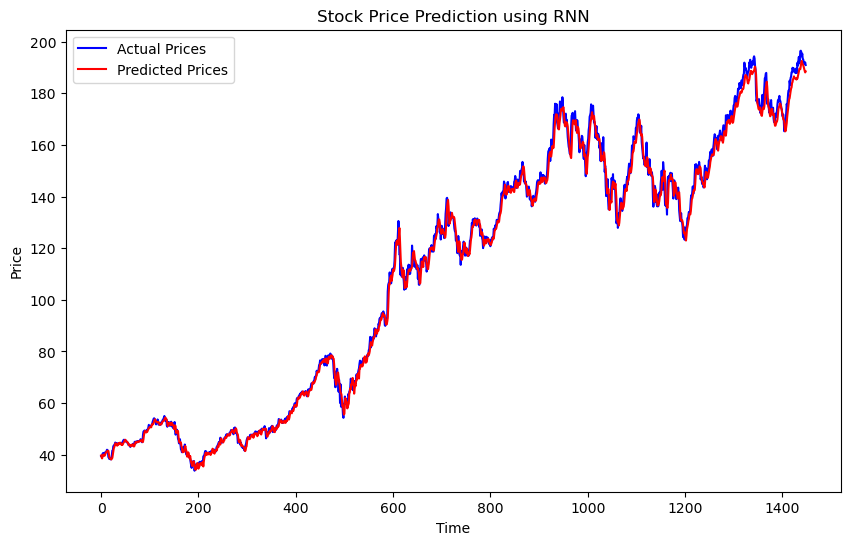

In [5]:
# Step 7: Predictions
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1,1))

# Step 8: Plot results
plt.figure(figsize=(10,6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
